In [1]:
#Selenium imports here
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait

In [2]:
#Other imports here 
import os
from bs4 import BeautifulSoup
# The datetime module supplies classes for manipulating dates and times
from datetime import date, timedelta
import time
from datetime import datetime
import pandas as pd

import numpy as np;
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
import sklearn
from sklearn import cluster

from sklearn import metrics, preprocessing, neighbors, cluster
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [4]:
# investpy is a Python package to retrieve data from Investing.com
# investpy allows the user to download both recent and historical data from all the financial products indexed at Investing.com. It includes data from all over the world
import investpy

In [5]:
# gets a list of dates and converts the list to a list of strings
def creat_list_str_dates(list_dates):
    new_list_dats = list()
    
    for d in list_dates:
        date = str(d.year) + '-'
        if d.month < 10:
            date += '0' + str(d.month) + '-'
        else:
            date += str(d.month) + '-'
        if d.day < 10:
            date += '0' + str(d.day)
        else:
            date += str(d.day)
        new_list_dats.append(date)  
    return new_list_dats

In [6]:
# mean_list function gets a series and returns it's avg
def mean_list(list_check):
    sum_ = 0
    for var in list_check:
        sum_ += var
    return sum_ / len(list_check)

# compere_len_list_to_df function gets a list and number of rows in the dataframe and checks if their sizes are equal
# compere_len_list_to_df function gets a list and numbers of rows in a dataframe
# if the the length of the list is bigger then the number of rows then while they are not equal pop the last node
# if the length of the list is smaller then the number of rows the parameter mean_temp gets the avg of the list
def compere_len_list_to_df(list_check,df_shape_0):
    if len(list_check) > df_shape_0:
        
        while len(list_check) != df_shape_0: 
            list_check.pop()
            
    elif len(list_check) < df_shape_0:
        
        mean_temp = mean_list(list_check)
        while len(list_check) != df_shape_0: 
            list_check.append(mean_temp)
            
# load_list_to_df function gets a list that contains all the data from the previous crawling stage
# in addition gets a parameter (i) that dictates if the the function was summoned before and another parameter which is the city 
def load_list_to_df(list_, i, city):
    df['Avg Temp ' + city] = list_[0][:len_dats_list - i]
    df['Wind Speed ' + city] = list_[1][:len_dats_list - i]
    df['Humidity ' + city] = list_[2][:len_dats_list - i]
    df['Pressure ' + city] = list_[3][:len_dats_list - i]
    df['Precipitation ' + city] = list_[4][:len_dats_list - i]
    
# clear_list function clears the contents of the list which was given to the function
def clear_list(list_):
    for l in list_:
        l.clear()
        

In [7]:
# The IQR or Inter Quartile Range is a statistical measure used to measure the 
# variability in a given data. In naive terms, it tells us inside what range the 
# bulk of our data lies. It can be calculated by taking the difference between the 
# third quartile and the first quartile within a dataset.
def return_IQR_Q1_Q3(list_):
        Q1 = np.percentile(list_, 25)
        Q3 = np.percentile(list_, 75)
        IQR = Q3 - Q1
        return IQR,Q1,Q3

#  mean_weak_ago function gets row col
# if row > 7 then the function returns the avg of the previous week (Series)
# if row < 7 then the function returns the avg of of the current Series 
def mean_weak_ago(row, col):
    sum_ = 0
    
    counter = 1

    if row > 7:
        for index in range(7):
            sub = row - index
            sum_ += df.iloc[row - sub: row - sub + 1, col: col+ 1].values[0][0] 
    else:
        print(f" (r,c): {row,col} valu {df.iloc[row: row + 1, col: col+ 1].values[0][0] } replace with: {df.iloc[:,col:col +1].mean().values[0]}\n")
        return df.iloc[:,col:col +1].mean().values[0]
    
    print(f" (r,c): {row,col} valu {df.iloc[row: row + 1, col: col+ 1].values[0][0] } replace with: {sum_ / 7}\n")
    return sum_ / 7

# chang_outliers function gets a list of outliers indexes and the col where the outlier was found 
# the function changes the outliers to the avg(mean) of the previous week (Series )
def chang_outliers(list_, col):
    for row in list_:
#         print(f"row = {row}\ncol = {col}") Humidity
        df.iloc[row:row+1,col:col+1] = mean_weak_ago(row, col)
# normalize function gets a dataframe and normalizes it
def normalize(df):
    for feature_name in df.columns:
        if len(df[(df[feature_name] != 0 )].index):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            df[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        

In [8]:
d1 = date(1990,1,1)
d2 = date(2020,1,1)

# this will give you a list containing all of the dates
dd = [d1 + timedelta(days=x) for x in range((d2-d1).days + 1)]
dats_list = creat_list_str_dates(dd)

# this will give you a list containing all of the month
date_per_month_list = list()
per1 = pd.date_range(start =d1, end =d2, freq ='M')
  
for val in per1:
    date_per_month_list.append(val)
# print(f"dats_list: {len(dats_list)}\ndate_per_month_list: {len(date_per_month_list)}")


In [124]:
# city_list is a list that contains all the cities that are reviewed in the project
city_list = ['Montgomery','Juneau','Phoenix','Little Rock','Sacramento','Hartford','Dover','Tallahassee','Atlanta','Honolulu','Boise','Springfield','Indianapolis','Des Moines','Topeka','Frankfort','Baton Rouge','Augusta','Annapolis','Boston','Lansing','St. Paul','Jackson','Jefferson City','Helena','Lincoln','Carson City','Concord','Trenton','Santa Fe','Albany','Raleigh','Bismarck','Columbus','Oklahoma City','Salem','Harrisburg','Providence','Columbia','Pierre','Nashville','Austin','Salt Lake City','Montpelier','Richmond','Olympia','Charleston','Madison','Cheyenne']
# BaseApi_city_by_country is a list that contains base url for the crawling process
BaseApi_city_by_country = ['https://www.wunderground.com/history/monthly/us/al/hope-hull/KMGM/date/','https://www.wunderground.com/history/monthly/us/ak/juneau/PAJN/date/','https://www.wunderground.com/history/monthly/us/az/phoenix/KPHX/date/','https://www.wunderground.com/history/monthly/us/ar/little-rock/KLIT/date/','https://www.wunderground.com/history/monthly/us/ca/sacramento/KSMF/date/','https://www.wunderground.com/history/monthly/us/ct/windsor-locks/KBDL/date/','https://www.wunderground.com/history/monthly/us/de/new-castle/KILG/date/','https://www.wunderground.com/history/monthly/us/fl/tallahassee/KTLH/date/','https://www.wunderground.com/history/monthly/us/ga/atlanta/KATL/date/','https://www.wunderground.com/history/monthly/us/hi/honolulu/PHNL/date/','https://www.wunderground.com/history/monthly/us/id/boise/KBOI/date/','https://www.wunderground.com/history/monthly/us/il/springfield/KSPI/date/','https://www.wunderground.com/history/monthly/us/in/indianapolis/KIND/date/','https://www.wunderground.com/history/monthly/us/ia/des-moines/KDSM/date/','https://www.wunderground.com/history/monthly/us/ks/berryton/KFOE/date/','https://www.wunderground.com/history/monthly/us/ky/lexington/KLEX/date/','https://www.wunderground.com/history/monthly/us/la/baton-rouge/KBTR/date/','https://www.wunderground.com/history/monthly/us/me/augusta/KAUG/date/','https://www.wunderground.com/history/monthly/us/md/baltimore/KBWI/date/','https://www.wunderground.com/history/monthly/us/ma/boston/KBOS/date/','https://www.wunderground.com/history/monthly/us/mi/lansing/KLAN/date/','https://www.wunderground.com/history/monthly/us/mn/minneapolis/KMSP/date/','https://www.wunderground.com/history/monthly/us/ms/pearl/KJAN/date/','https://www.wunderground.com/history/monthly/us/mo/columbia/KCOU/date/','https://www.wunderground.com/history/monthly/us/mt/helena/KHLN/date/','https://www.wunderground.com/history/monthly/us/ne/lincoln/KLNK/date/','https://www.wunderground.com/history/monthly/us/nv/reno/KRNO/date/','https://www.wunderground.com/history/monthly/us/nh/manchester/KMHT/date/','https://www.wunderground.com/history/monthly/us/nj/ewing-township/KTTN/date/','https://www.wunderground.com/history/monthly/us/nm/santa-fe/KSAF/date/','https://www.wunderground.com/history/monthly/us/ny/latham/KALB/date/','https://www.wunderground.com/history/monthly/us/nc/morrisville/KRDU/date/','https://www.wunderground.com/history/monthly/us/nd/bismarck/KBIS/date/','https://www.wunderground.com/history/monthly/us/oh/columbus/KCMH/date/','https://www.wunderground.com/history/monthly/us/ok/oklahoma-city/KOKC/date/','https://www.wunderground.com/history/monthly/us/or/salem/KSLE/date/','https://www.wunderground.com/history/monthly/us/pa/middletown/KMDT/date/','https://www.wunderground.com/history/monthly/us/ri/warwick/KPVD/date/','https://www.wunderground.com/history/monthly/us/sc/west-columbia/KCAE/date/','https://www.wunderground.com/history/monthly/us/sd/pierre/KPIR/date/','https://www.wunderground.com/history/monthly/us/tn/nashville/KBNA/date/','https://www.wunderground.com/history/monthly/us/tx/austin/KAUS/date/','https://www.wunderground.com/history/monthly/us/ut/salt-lake-city/KSLC/date/','https://www.wunderground.com/history/monthly/us/vt/south-burlington/KBTV/date/','https://www.wunderground.com/history/monthly/us/va/henrico/KRIC/date/','https://www.wunderground.com/history/monthly/us/wa/seatac/KSEA/date/','https://www.wunderground.com/history/monthly/us/wv/charleston/KCRW/date/','https://www.wunderground.com/history/monthly/us/wi/madison/KMSN/date/','https://www.wunderground.com/history/monthly/us/wy/cheyenne/KCYS/date/']
city_list.remove('Austin')
BaseApi_city_by_country.remove('https://www.wunderground.com/history/monthly/us/tx/austin/KAUS/date/')
# prints the length of the lists city_list,BaseApi_city_by_country
print(f"len city: {len(city_list)}\nlen url: {len(BaseApi_city_by_country)}")

In [11]:
df = pd.DataFrame({})

In [12]:
driver = webdriver.Chrome()
driver.set_page_load_timeout(10000)

In [10]:
# Avg_Temperature,Wind_Speed,date_list,Humidity_list,Pressure_list,Precipitation_list are lists containing the values of of the parameters
# arr_list is an array that contains the lists mentioned above 
# Round_flag is a parameter designed to indicate whether this is the first iteration 
# first for loop runs on two parameters index,bace_url which travel on the baseApi_ and city_by_country
#second for loop uses parameter  date to travel the contents(dates) that date_per_month_list contains
# the second for loop details the time delay between crawling one page and moving to next and, current_url contains the address that we are crawling on currently
# the parameter mtag mentioned in the while loop details whether the page was fully loaded if not he calls the page again and increases the wate time
# the table paramteter is a chart containing the values that we desire
# the 'tr' tag represents a series inside the table(chart)
# the 'td' tage represents a row inside of the 'tr' series
# the following lists: Precipitation_table,Pressure_Hg_table, Humidity_prsent_table, Wind_Speed_mph_table,Temperature_F_table contain the contents of the table

Avg_Temperature = []
Wind_Speed = []
date_list = []
Humidity_list =[]
Pressure_list = []
Precipitation_list = []

arr_list = [Avg_Temperature, Wind_Speed, Humidity_list, Pressure_list, Precipitation_list]

Round_flag = 0

for index_city,bace_url in enumerate(BaseApi_city_by_country):
    city = city_list[index_city]
    for date in date_per_month_list:
        time_wate = 3
        year = date.year
        month = date.month
        
        curnt_url = bace_url + str(year) + '-' + str(month)
        driver.get(curnt_url)
        time.sleep(time_wate)    
        html=driver.page_source
        
        soup=BeautifulSoup(html,'html.parser')
        mtag = soup.findAll("tbody")
        
        while len(mtag) < 6:
            print(f"city: {city}\nstop in: {year}/{month} \nlen(mtag): {len(mtag)}\ntime_wate: {time_wate}\n ")
            time_wate += 1
            driver.get(curnt_url)
            time.sleep(time_wate)    
            html=driver.page_source
           
            soup=BeautifulSoup(html,'html.parser')
            mtag = soup.findAll("tbody")
    
        table = mtag[5].findAll("table")
        
        Precipitation_table = table[6].findAll("tr")
        Pressure_Hg_table = table[5].findAll("tr")
        Humidity_prsent_table = table[3].findAll("tr")
        Wind_Speed_mph_table = table[4].findAll("tr")
        Temperature_F_table = table[1].findAll("tr")
        days_number = len(Temperature_F_table)
#         print(f"days_number: {days_number}\n")
        
        for index in range(1,days_number):# days_number + 1 ????
            Avg_Temp = Temperature_F_table[index].findAll("td")[1].getText()
            Avg_Speeed = Wind_Speed_mph_table[index].findAll("td")[1].getText()
            Avg_Humidity = Humidity_prsent_table[index].findAll("td")[1].getText()
            Avg_Pressure = Pressure_Hg_table[index].findAll("td")[1].getText()
            Precipitation = Precipitation_table[index].findAll("td")[0].getText()
            
#             print(f"index: {index} in moth: {month}")
            
            Avg_Temperature.append(float(Avg_Temp))
            Wind_Speed.append(float(Avg_Speeed))
            Humidity_list.append(float(Avg_Humidity))
            Pressure_list.append(float(Avg_Pressure))
            Precipitation_list.append(float(Precipitation))
   
    print(f"city: {city} numbe: {index_city}\nsize Avg_Temperature :{len(Avg_Temperature)}\nsize Wind_Speed :{len(Wind_Speed)}\nsize Humidity_list :{len(Humidity_list)}\nsize Pressure_list :{len(Pressure_list)}-----> month: {month}\n\n")
    
    len_dats_list = len(dats_list)
#     print(df)
    
    if Round_flag == 0:
        Round_flag = 1
        load_list_to_df(arr_list, 1,city)
    else:
        df_row = df.shape[0]
        for lis in arr_list:
            compere_len_list_to_df(lis, df_row)
        load_list_to_df(arr_list, 0,city)   
    
#     print("brik!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
#     time.sleep(10)  
    clear_list(arr_list)


In [59]:
# saves the dataframe
# df.to_csv('df_15_yers.csv')

# reads the dataframe
df = pd.read_csv('df_after_merge_1990_2020.csv', header=0, sep=',') 
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [60]:
# df2 is a dataframe that contains the same amount of dates that we crawled on 
df2 = pd.DataFrame({'Date_' : dats_list[:df.shape[0]] })

In [61]:
# merge  df and df2
for index,col in enumerate(df.columns):
    df2[col] = df[col]


moth_list = list()
yers_list = list()

# create a  list of month and year
for date_ in dd:
    moth_list.append(date_.month)
    yers_list.append(date_.year)


In [62]:
df = df2
# adds the the following columns : Month,Year to the dataframe
df['Month'] = moth_list[:df.shape[0]]
df['Year'] = yers_list[:df.shape[0]]
df
# df.drop(['Unnamed: 0'], axis=1, inplace = True)
df


,Date_,Avg Temp Montgomery,Wind Speed Montgomery,Humidity Montgomery,Pressure Montgomery,Precipitation Montgomery,Avg Temp Juneau,Wind Speed Juneau,Humidity Juneau,Pressure Juneau,...,Humidity Madison,Pressure Madison,Precipitation Madison,Avg Temp Cheyenne,Wind Speed Cheyenne,Humidity Cheyenne,Pressure Cheyenne,Precipitation Cheyenne,Month,Year
0,1990-01-01,41.2,8.7,67.8,30.1,0.00,15.8,8.8,56.1,28.7,...,71.4,29.2,0.0,36.5,13.5,47.3,23.9,0.00,1,1990
1,1990-01-02,41.3,3.1,66.0,30.2,0.00,14.0,6.0,64.9,28.8,...,78.3,29.1,0.0,35.0,13.3,48.2,23.7,0.00,1,1990
2,1990-01-03,50.8,5.4,60.1,30.1,0.00,17.5,2.9,67.9,29.8,...,72.4,29.0,0.0,20.8,16.9,60.8,23.9,0.00,1,1990
3,1990-01-04,41.5,5.2,70.0,29.9,0.00,19.6,0.6,89.3,29.7,...,62.0,29.0,0.0,22.8,16.5,46.8,24.1,0.00,1,1990
4,1990-01-05,37.1,5.3,60.3,29.9,0.00,24.6,3.0,85.4,29.1,...,65.4,29.2,0.0,27.5,19.6,54.0,24.1,0.00,1,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10924,2019-11-29,59.2,5.5,88.0,30.0,0.00,37.3,10.3,88.0,29.5,...,79.8,29.1,0.0,34.5,8.1,71.0,23.7,0.00,11,2019
10925,2019-11-30,64.7,8.8,87.2,29.8,0.11,39.8,23.8,79.2,29.6,...,86.8,29.0,0.0,28.6,6.6,82.9,23.9,0.00,11,2019
10926,2019-12-01,71.1,10.0,82.8,29.6,0.02,40.0,17.6,85.0,29.2,...,89.0,28.9,0.0,26.5,5.8,81.0,23.8,0.02,12,2019
10927,2019-12-02,54.1,9.8,65.4,29.7,0.04,37.0,14.0,85.0,29.5,...,82.0,29.0,0.0,19.8,18.4,80.6,23.7,0.19,12,2019


In [63]:
# Using investpy to get the data from Investing.com about wheat and oil

# data of wheat
search_result = investpy.search_quotes(text='ZW', products=['commodities'], countries=['united states'], n_results=1)
WheatData = search_result.retrieve_historical_data(from_date='01/01/1990', to_date='01/01/2020')

# create col of avg and delete the following cols : 'Open','High','Low','Close','Volume','Change Pct' 
WheatData["avag"] = (WheatData["Open"]+WheatData["Close"])/2
WheatData.drop(axis=1, columns=['Open','High','Low','Close','Volume','Change Pct'], inplace = True)
WheatData

# create a dataframe of dates and the average price of wheat
list_ZW = creat_list_str_dates(WheatData.index)
df_Wheath = pd.DataFrame({"Date_" : list_ZW,"Wheath Avag" : WheatData['avag'] })
# df_Wheath

# data of oil
oil_results = investpy.search_quotes(text='WTI', products=['commodities'], countries=['united states'], n_results=1)
OilData = oil_results.retrieve_historical_data(from_date='01/01/1990', to_date='01/01/2020')

# create a col of avg and drop the following cols: 'Open','High','Low','Close','Volume','Change Pct' 
OilData['oil_avag'] = (OilData['Open'] +OilData['Close'])/2
OilData.drop(axis=1, columns=['Open','High','Low','Close','Volume','Change Pct'], inplace = True)

# create a dataframe of date and the avg price of wheat
list_Oil = creat_list_str_dates(OilData.index)
df_Oil = pd.DataFrame({"Date_" : list_Oil,"Oil Avag" : OilData['oil_avag'] })
# df_Oil

In [64]:
# merge both df_Wheath and df_Oil to one dataframe called 'DateBeforeProces' whether a row  will appear in the newly formed dataframe depends on whether the date of said rows existed in both dataframes to begin with.

# also merge both DateBeforeProces and df to redefine  'DateBeforeProces'  whether a row  will appear in the newly formed dataframe depends on whether the date of said rows existed in both dataframes to begin with.
DateBeforeProces = pd.merge(df_Wheath,df_Oil,on = 'Date_')
DateBeforeProces = pd.merge(DateBeforeProces,df,on = 'Date_')
DateBeforeProces

,Date_,Wheath Avag,Oil Avag,Avg Temp Montgomery,Wind Speed Montgomery,Humidity Montgomery,Pressure Montgomery,Precipitation Montgomery,Avg Temp Juneau,Wind Speed Juneau,...,Humidity Madison,Pressure Madison,Precipitation Madison,Avg Temp Cheyenne,Wind Speed Cheyenne,Humidity Cheyenne,Pressure Cheyenne,Precipitation Cheyenne,Month,Year
0,1990-01-02,408.500,22.350,41.3,3.1,66.0,30.2,0.00,14.0,6.0,...,78.3,29.1,0.0,35.0,13.3,48.2,23.7,0.00,1,1990
1,1990-01-03,408.875,23.435,50.8,5.4,60.1,30.1,0.00,17.5,2.9,...,72.4,29.0,0.0,20.8,16.9,60.8,23.9,0.00,1,1990
2,1990-01-04,409.625,23.655,41.5,5.2,70.0,29.9,0.00,19.6,0.6,...,62.0,29.0,0.0,22.8,16.5,46.8,24.1,0.00,1,1990
3,1990-01-05,409.000,23.245,37.1,5.3,60.3,29.9,0.00,24.6,3.0,...,65.4,29.2,0.0,27.5,19.6,54.0,24.1,0.00,1,1990
4,1990-01-08,410.625,22.080,38.0,9.8,75.1,29.8,0.00,27.8,9.0,...,75.6,28.7,0.0,43.7,29.2,47.9,23.6,0.00,1,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7503,2019-11-27,529.250,58.190,53.9,2.9,82.6,29.8,0.00,34.7,5.9,...,70.9,29.3,0.0,42.1,6.8,33.7,23.9,0.00,11,2019
7504,2019-11-28,526.185,58.025,57.3,5.0,71.3,29.9,0.00,36.6,20.1,...,71.3,29.2,0.0,39.6,6.4,35.5,23.7,0.00,11,2019
7505,2019-11-29,540.000,56.650,59.2,5.5,88.0,30.0,0.00,37.3,10.3,...,79.8,29.1,0.0,34.5,8.1,71.0,23.7,0.00,11,2019
7506,2019-12-02,546.375,55.715,54.1,9.8,65.4,29.7,0.04,37.0,14.0,...,82.0,29.0,0.0,19.8,18.4,80.6,23.7,0.19,12,2019


In [65]:
# drop duplicates rows and nan valus

DateBeforeProces = DateBeforeProces.dropna()
DateBeforeProces = DateBeforeProces.drop_duplicates()

In [125]:
# save the list of month, list of yers after clinhng and merge the ralvent mech rows
# creating list_of_month parameter to hold the series 'month' from the dataframe 'DateBeforeProces'
# creating list_of_yers parameter to hold the series 'Year' from the dataframe 'DateBeforeProces'
# after cleaning and merging the relevant matching rows
list_of_month = DateBeforeProces['Month']
list_of_yers = DateBeforeProces['Year']

# drop both the 'month' series and the 'Year' seires after saving them, in order to manipulate the values 
DateBeforeProces.drop(['Month'], axis=1, inplace = True)
DateBeforeProces.drop(['Year'], axis=1, inplace = True)

In [70]:
# insert DateBeforeProces without the first 3 cols to df, in order to manipulate the values
df =  DateBeforeProces.iloc[:,3:] 

In [126]:
# Handling the outlier values of each column using IQR 
# IQR is a statistical measure used to measure the variability in a given data
counter = 1
while counter:
    print(f"counter: {counter}###########################################################################")
    counter = 0
    for index,col in enumerate(df.columns[0:]):
#       TEMP
        if index % 5 == 0:  
            IQR,Q1,Q3 = return_IQR_Q1_Q3(df[col])
            outlier_rows = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR )].index
            chang_outliers(outlier_rows,index)
#       SPEED Wind      
        if index % 5 == 1:  
            IQR,Q1,Q3 = return_IQR_Q1_Q3(df[col])
            outlier_rows = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR ) | (df[col] < 0)].index
            chang_outliers(outlier_rows,index)
#       Humidity    
        if index % 5 == 2:  
            IQR,Q1,Q3 = return_IQR_Q1_Q3(df[col])
            outlier_rows = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR ) | (df[col] < 0)].index
            chang_outliers(outlier_rows,index)
#       Pressure            
        if index % 5 == 3:  
            IQR,Q1,Q3 = return_IQR_Q1_Q3(df[col])
            outlier_rows = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR ) | (df[col] < 0)].index
            chang_outliers(outlier_rows,index)
#       Precipitation            
#         if index % 5 == 4:  
#             IQR,Q1,Q3 = return_IQR_Q1_Q3(df[col])
#             outlier_rows = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR ) | (df[col] < 0)].index
#             chang_outliers(outlier_rows,index)
        
        print(f"END!!!!!!!!!!!!!!!!!!!!!! index = {index}")

In [127]:
# df.to_csv('df_after_outlier.csv',date_format='%Y%m%d')

In [73]:
# df3 gets the the first 3 columns of the dataframes before processing(wheath,oil.date)
df3 = DateBeforeProces.iloc[:,:3]
# insert the values of df into df3 after taking care of the outliers
for col in df.columns:
    df3[col] = df[col]
# df3 = df3.iloc[:,1:]
df3.drop(['Date_'], axis=1, inplace = True)

In [74]:
# df3.to_csv('df_after_normalize.csv',date_format='%Y%m%d')

In [128]:
normalize_df = df3.copy()
# normalize copy of df3
normalize(normalize_df)
# puting in df the normalized values not including 'wheath' and 'oil'
df = normalize_df.iloc[:,2:]
DateBeforeProces = normalize_df
DateBeforeProces

,Wheath Avag,Oil Avag,Avg Temp Montgomery,Wind Speed Montgomery,Humidity Montgomery,Pressure Montgomery,Precipitation Montgomery,Avg Temp Juneau,Wind Speed Juneau,Humidity Juneau,...,Avg Temp Madison,Wind Speed Madison,Humidity Madison,Pressure Madison,Precipitation Madison,Avg Temp Cheyenne,Wind Speed Cheyenne,Humidity Cheyenne,Pressure Cheyenne,Precipitation Cheyenne
0,0.247499,0.086346,0.310249,0.231343,0.463722,0.589676,0.000000,0.110759,0.304569,0.325000,...,0.421775,0.715152,0.658805,0.428571,0.0,0.473224,0.559585,0.412032,0.285714,0.000000
1,0.247828,0.094432,0.441828,0.402985,0.370662,1.000000,0.000000,0.166139,0.147208,0.382692,...,0.458371,0.709091,0.566038,0.285714,0.0,0.318033,0.746114,0.555051,0.571429,0.000000
2,0.248488,0.096072,0.313019,0.388060,0.526814,0.714286,0.000000,0.199367,0.030457,0.794231,...,0.337603,0.618182,0.402516,0.285714,0.0,0.339891,0.725389,0.396141,0.857143,0.000000
3,0.247938,0.093016,0.252078,0.395522,0.373817,0.714286,0.000000,0.278481,0.152284,0.719231,...,0.298262,0.460606,0.455975,0.571429,0.0,0.391257,0.886010,0.477866,0.857143,0.000000
4,0.249368,0.084333,0.264543,0.731343,0.607256,0.571429,0.000000,0.329114,0.456853,0.684615,...,0.448307,0.587879,0.616352,0.405282,0.0,0.568306,0.499787,0.408627,0.142857,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7503,0.353711,0.353469,0.484765,0.216418,0.725552,0.571429,0.000000,0.438291,0.299492,0.796154,...,0.505032,0.363636,0.542453,0.714286,0.0,0.550820,0.222798,0.247446,0.571429,0.000000
7504,0.351015,0.352240,0.531856,0.373134,0.547319,0.714286,0.000000,0.468354,0.258883,0.767308,...,0.548948,0.442424,0.548742,0.571429,0.0,0.523497,0.202073,0.267877,0.285714,0.000000
7505,0.363167,0.341992,0.558172,0.410448,0.810726,0.857143,0.000000,0.479430,0.522843,0.769231,...,0.516011,0.290909,0.682390,0.428571,0.0,0.467760,0.290155,0.670829,0.285714,0.000000
7506,0.368774,0.335023,0.487535,0.731343,0.454259,0.428571,0.004831,0.474684,0.710660,0.711538,...,0.545288,0.412121,0.716981,0.285714,0.0,0.307104,0.823834,0.779796,0.285714,0.045238


In [76]:
# zip_col function gets 2 lists, the function takes 'list_' and inserts it's values into 'zip_list' and by doing that changes 'zip_list'
def zip_col(zip_list, list_):
    for index,val in enumerate(list_):
        zip_list[index] += val 
    return zip_list

In [78]:
zip_tamp = []
zip_Wind = []
zip_Humidity = []
zip_Pressure = []
zip_Precipitation = []

In [79]:
# Performs a Regregation on all columns and puts 

# them into the 5 columns which sum all the columns,in accordance with the type of values the column represents

zip_tamp = df['Avg Temp Montgomery'].copy()
zip_Wind = df['Wind Speed Montgomery'].copy()
zip_Humidity = df['Humidity Montgomery'].copy()
zip_Pressure = df['Pressure Montgomery'].copy()
zip_Precipitation = df['Precipitation Montgomery'].copy()


for index,col in enumerate(df.columns[5:]):
    if index % 5 == 0:  #         print(col) TEMP
        zip_tamp = zip_col(zip_tamp,df[col].copy())
    if index % 5 == 1:  #         print(col) SPEED
        zip_Wind = zip_col(zip_Wind,df[col].copy())
    if index % 5 == 2:  #         print(col) Humidity
        zip_Humidity = zip_col(zip_Humidity,df[col].copy())
    if index % 5 == 3:  #         print(col) Pressure
        zip_Pressure = zip_col(zip_Pressure,df[col].copy())
    if index % 5 == 4:  #         print(col) Precipitation
        zip_Precipitation = zip_col(zip_Precipitation,df[col].copy())
print(f"END!!!!!!!!!!!!!!!!!!!!!! index = {index}")
#         print(f"IQR = {IQR}\nQ1 = {Q1}\nQ2 = {Q3}")
        

END!!!!!!!!!!!!!!!!!!!!!! index = 234


In [80]:
# creating a new dataframe called 'zip_df' with the zip columns
zip_df = pd.DataFrame({ 'zip temp' : zip_tamp, 'zip Wind Speed' : zip_Wind ,'zip Humidity' : zip_Humidity , 'zip Pressure' : zip_Pressure, 'zip Precipitation' :zip_Precipitation})

In [81]:
# normalizing the dataframe after summing up all the columns
zip_df = zip_df.divide(other = 48)

In [82]:
# adding to zip_df the normalized 'Oil Avag'
zip_df['Oil Avag'] = normalize_df['Oil Avag']

# adding the 'Month' and 'Year' to zip_df
zip_df['Month'] = list_of_month
zip_df['Year'] = list_of_yers

# adding to zip_df  the unnormalized 'Wheath Avag'
zip_df['Wheath Avag'] = df3['Wheath Avag']

In [83]:
# saving final dataframe
# zip_df.to_csv('df_final_zip.csv')

In [119]:
# splitData function gets features (array) which contains the names of the columns which we deliver to him , the function returns the parameters which we use to conduct the machine learning process with.
# train_test_split Functions for partition of data.
def splitData(features):
    
    df_try_predictors = df_try[features].values
    df_try_labels = df_try["Wheath Avag"].values

# Split into training and test sets
    XTrain, XTest, yTrain, yTest = train_test_split(df_try_predictors, df_try_labels, random_state=1, test_size=0.7)
    return XTrain, XTest, yTrain, yTest

In [108]:
# zip_df = pd.read_csv('df_final_zip.csv', header=0, sep=',') 

In [93]:
df_try = zip_df.copy()
# df_try.drop(axis=1, columns=['Unnamed: 0'], inplace = True)
df_try 

,zip temp,zip Wind Speed,zip Humidity,zip Pressure,zip Precipitation,Oil Avag,Month,Year,Wheath Avag
0,0.353096,0.544789,0.493786,0.618069,0.000000,0.086346,1,1990,408.500
1,0.382978,0.521128,0.530947,0.663061,0.000000,0.094432,1,1990,408.875
2,0.363164,0.549351,0.563416,0.537679,0.000000,0.096072,1,1990,409.625
3,0.355183,0.451443,0.553635,0.611075,0.000000,0.093016,1,1990,409.000
4,0.392690,0.513186,0.545474,0.349210,0.000000,0.084333,1,1990,410.625
...,...,...,...,...,...,...,...,...,...
7503,0.439248,0.335240,0.621755,0.582743,0.020029,0.353469,11,2019,529.250
7504,0.471123,0.367778,0.624683,0.449852,0.032629,0.352240,11,2019,526.185
7505,0.471882,0.365062,0.641327,0.450454,0.019512,0.341992,11,2019,540.000
7506,0.483394,0.427775,0.743401,0.541693,0.018287,0.335023,12,2019,546.375


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

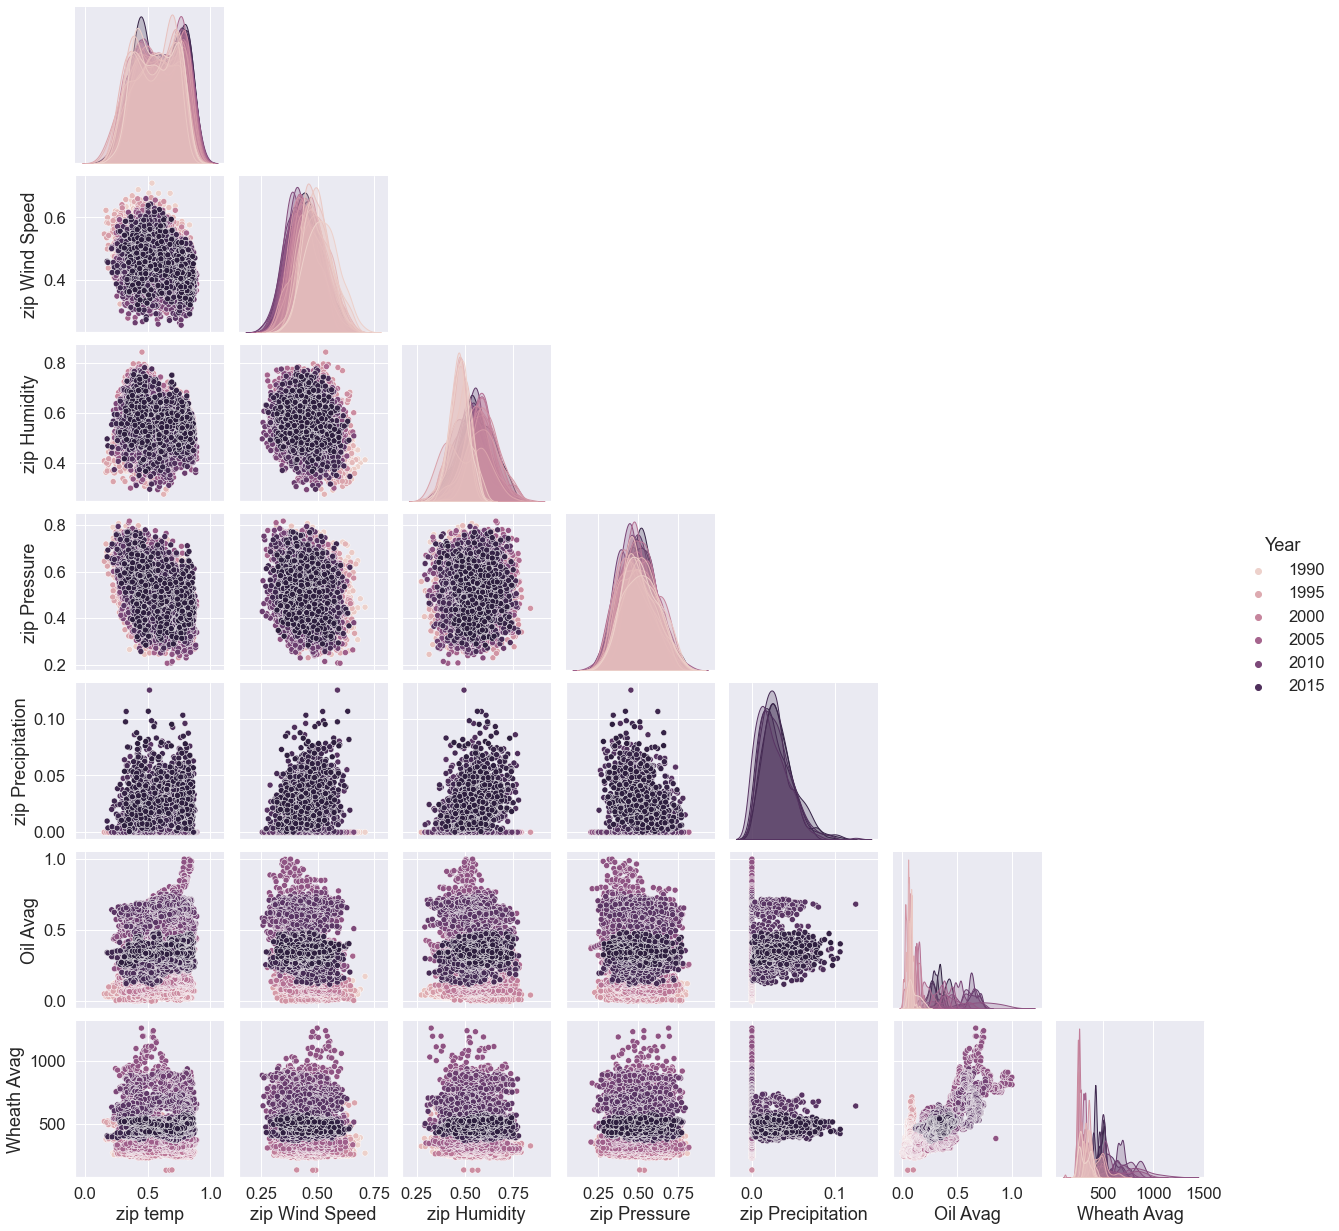

In [133]:
# df_try.drop(axis=1, columns=['Month'], inplace = True)
sns.set(font_scale=1.5)
sns.pairplot(df_try, hue="Year" ,corner=True)

coefficient of determination: 0.6449409487875114


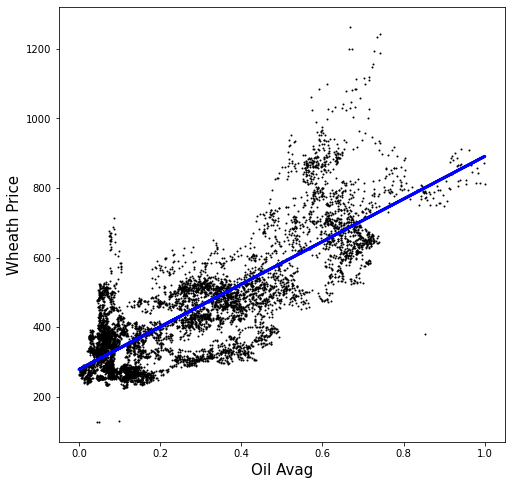

Slope: [612.88591804]
Intercept: 278.33435219680445
R2: 0.6449409487875114


In [91]:
# linear regression between oil and Wheath
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()

x = np.array(df_try['Oil Avag']).reshape((-1, 1))

y =df_try['Wheath Avag']

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

plt.figure(figsize=(8, 8))

plt.scatter(x, y,  color='black',s = 1)
plt.plot(x, model.predict(x), color='blue', linewidth=3)

plt.xlabel('Oil Avag',fontsize = 15)
plt.ylabel('Wheath Price',fontsize = 15)
plt.show()

print("Slope:",model.coef_)
print("Intercept:",model.intercept_)
print("R2:",model.score(x,y))

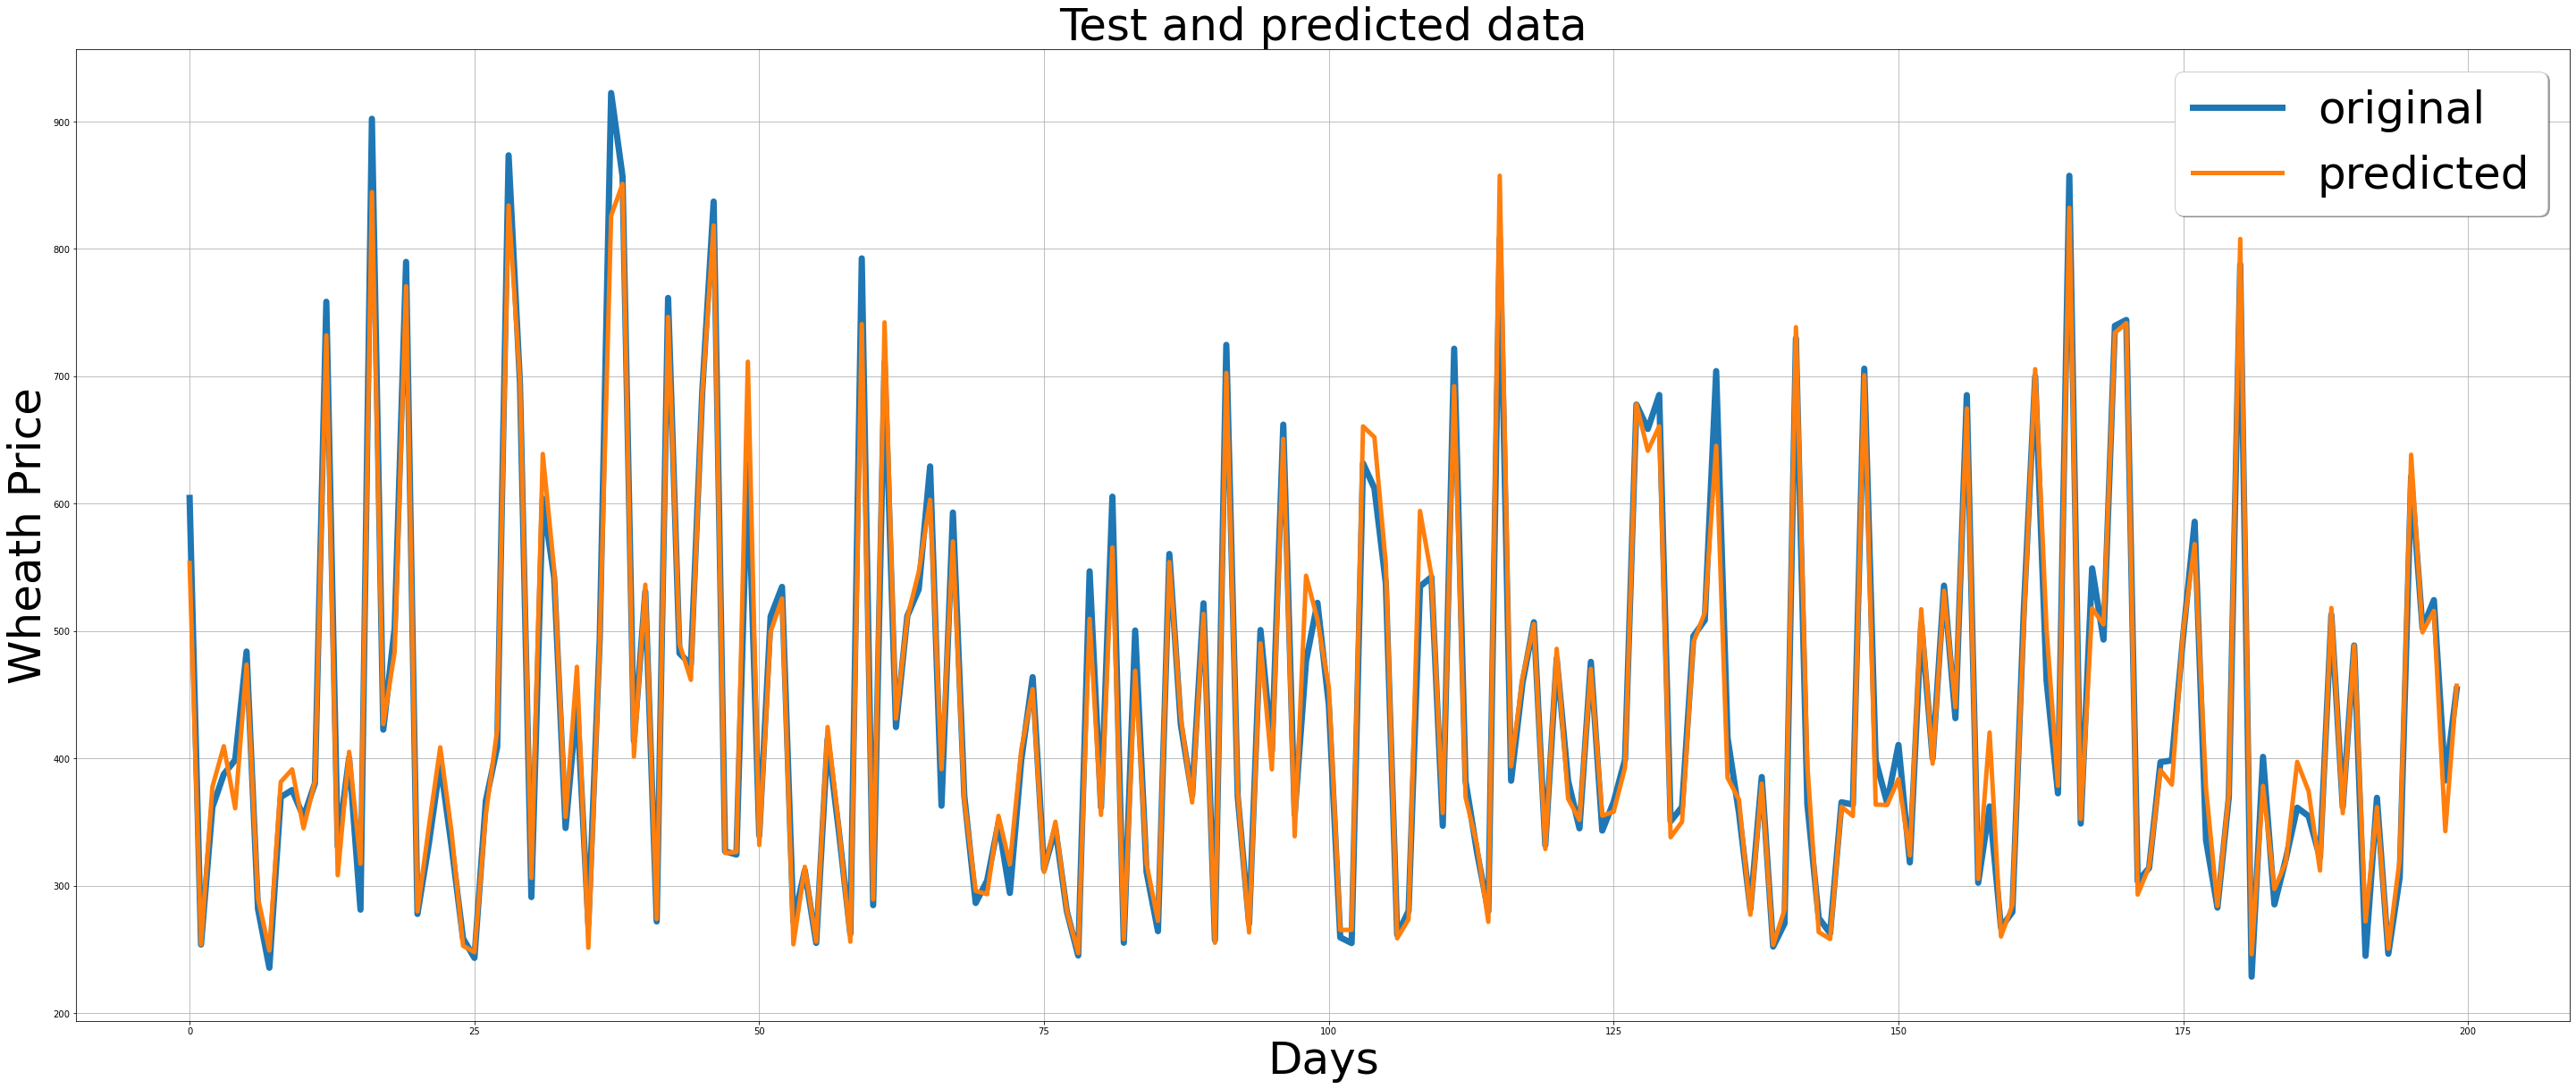

In [120]:
# A random forest is a meta estimator that fits a number
# of classifying decision trees on various sub-samples
# of the dataset and uses averaging to improve the predictive accuracy and control over-fitting
# the end result is the differnce between the original values and the predicted ones
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
import math

all_features = ["zip temp", "zip Wind Speed", "zip Humidity", "zip Pressure", "zip Precipitation", "Oil Avag","Month","Year"]

XTrain, XTest, yTrain, yTest = splitData(all_features)

forest =  RandomForestRegressor(bootstrap=True, n_estimators=150, random_state=0)

trained_forest = forest.fit(XTrain, yTrain) 

y_pred = trained_forest.predict(XTest)

plt.figure(figsize=(50,20))

x_ax = range(len(yTest[1000:1200]))
plt.plot(x_ax, yTest[1000:1200], label="original",linewidth=7)
plt.plot(x_ax, y_pred[1000:1200], label="predicted", linewidth=5)
plt.title("Test and predicted data",fontsize = 50)
plt.xlabel('Days',fontsize = 50)
plt.ylabel('Wheath Price',fontsize = 50)
plt.legend(loc='best',fancybox=True, shadow=True ,fontsize = 50)
plt.grid(True)
plt.show()

In [121]:
# Performance metrics
errors = abs(y_pred - yTest)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / yTest)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 17.06 degrees.
Accuracy: 96.38 %.


In [122]:
# prediction is a function that gets unormalized values and prints the price that the machine learning process predicts
def prediction(temp,wind,humedity,preser,Precipitation,Oil,month,Year):
    temp /= 114.7257277
    wind /= 5.688250826
    humedity /= 132.7369556
    preser /= 47.78901604
    Oil /= 85.02835927
    
    ruzolt = trained_forest.predict([[temp,wind,humedity,preser,Precipitation,Oil,month,Year]]) 
    print(ruzolt)

In [123]:
prediction(36.9, 12.2, 73.1, 30.1,0,75.365,1,2022)
# y_pred = trained_forest.predict([[36.9,12.2,73.1,30.1,75.365,1]])
# y_pred 

[605.58266667]
